In [ ]:
#loading libraries 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from PIL import Image 
from numpy import asarray
from matplotlib import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from sklearn.model_selection import train_test_split
import cv2
import os, shutil
from tensorflow.keras import layers

In [ ]:
from google.colab import drive  #connecting colab to mydrive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/my_dataset/'  #my_dataset is the folder that  contains the images.zip and the train.csv

In [ ]:
train=pd.read_csv(path+'train_labels.csv') #loading the train set with pandas 
train.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [ ]:
train.shape

(1308, 2)

In [ ]:
count=train['target'].value_counts()
print(count)

0    664
1    644
Name: target, dtype: int64


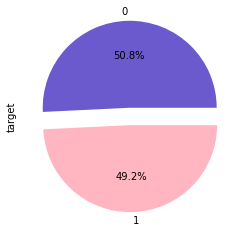

In [ ]:
train['target'].value_counts().plot.pie(explode=[0.1,0.1], autopct="%1.1f%%",colors=['slateblue','lightpink'])
#a simple plot that shows the number of zeros and ones in the column target 


#**Splitting the image into train/test for the visualization:**




In [ ]:
list_train_images=train['image'].tolist() #converting images column into list
path2='/content/drive/MyDrive/my_dataset/images/' 
train['file_name'] = path2+train['image'] #adding new column in the train set that helps for the visualization of the images 
#file name contains exactly the path of every image
train.head()

,image,target,file_name
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0,/content/drive/MyDrive/my_dataset/images/tfyml...
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1,/content/drive/MyDrive/my_dataset/images/rxgis...
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0,/content/drive/MyDrive/my_dataset/images/uuzsh...
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0,/content/drive/MyDrive/my_dataset/images/mjspx...
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1,/content/drive/MyDrive/my_dataset/images/rlbmu...


#**Visualization:**




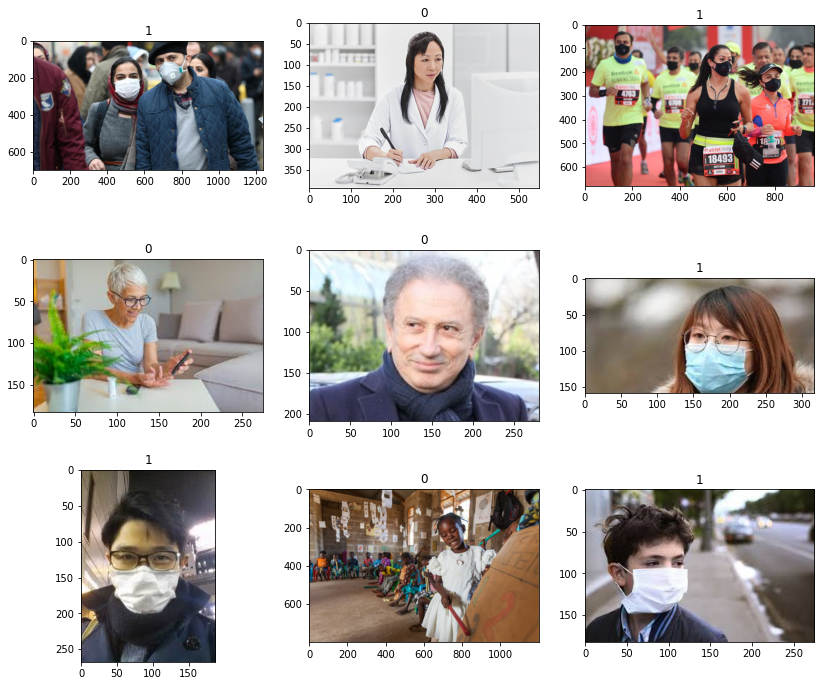

In [ ]:
nrows=3 
rand = np.random.randint(len(list_train_images), size=nrows**2)
fig=plt.figure(figsize=(14,12))
for i in range(nrows**2):
  img=cv2.imread(train.loc[rand[i],'file_name'])  #cv2.imread() is a method of OpenCV that loads an image from the specified file 
  RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cvtColor makes the original color of the image (COLOR_BGR2RGB)
  ax = plt.subplot(nrows, nrows, i+1)
  plt.imshow(RGB_img)
  plt.title(train.loc[rand[i], 'target'])
plt.show()

In [ ]:
images_list = os.listdir('/content/drive/MyDrive/my_dataset/images/') #image entries
test_images_list = [i for i in images_list if i not in list_train_images] #check the entries of image and append them to 
# test_image_list only if doesn't already exist in train image list

In [ ]:
sub = pd.DataFrame(test_images_list, columns=['image']) #newdata frame that contains 2columns: the test_images_list and the target=0
#as mentionned in the example sample.csv in Zindi 
sub['target'] = 0
sub['file_name'] = path2+sub['image'] 

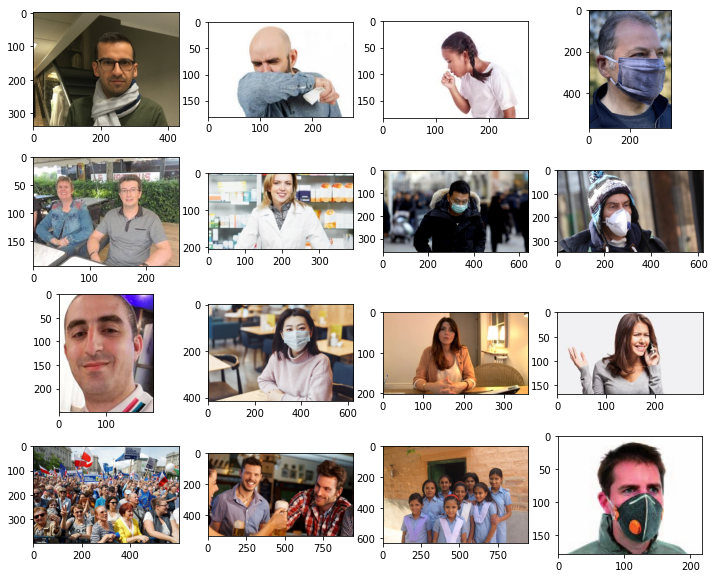

In [ ]:
#Test images
nrows = 4
rands = np.random.randint(len(test_images_list), size=nrows**2)
fig = plt.figure(figsize=(12,10))

for i in range(nrows**2):
    img = cv2.imread(sub.loc[rands[i], 'file_name'])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(nrows, nrows, i+1)
    plt.imshow(RGB_img)
plt.show()

#**Data Preprocessing:**

In [ ]:
#Building a preprocessing function that converts images to arrays : 
def image_prep(picture):
  liste=[]
  for i in (picture):   #loading the image 
    picture_path=path2+i
    img=Image.open(picture_path) # Opens and identifies the given image file
    img=tf.keras.preprocessing.image.load_img(picture_path,target_size=(300,300)) #resizing the image
    img=tf.keras.preprocessing.image.img_to_array(img)   # converting from image to array 
    img=tf.keras.applications.xception.preprocess_input(img) #converting from integers to float and normalize to range 0-1 
    liste.append(img)
  n=np.array(liste)
  return(n)

#**Splitting the data into train and test**


In [ ]:
#We split our data into images and targets and preprocess all images in the dataset 
X=image_prep(train.image)
y=train.target

In [ ]:
train_images,test_images,train_labels,test_labels= train_test_split(X, y, test_size=0.2, random_state=23)
#Print dataset shapes (images & labels)
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape 

((1046, 300, 300, 3), (1046,), (262, 300, 300, 3), (262,))

In [ ]:
train_images[0]

array([[[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.92941177,  0.8901961 ,  0.8666667 ],
        [ 0.92941177,  0.8901961 ,  0.8666667 ],
        ...,
        [ 0.9137255 ,  0.7019608 ,  0.47450984],
        [ 0.9137255 ,  0.7019608 ,  0.47450984],
        [ 0.8117647 ,  0.67058825,  0.49803925]],

       [[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        ...,
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8117647 ,  0.67058825,  0.5137255 ]],

       [[ 0.90588236,  0.8745098 ,  0.8509804 ],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        [ 0.9372549 ,  0.8745098 ,  0.85882354],
        ...,
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8901961 ,  0.6784314 ,  0.45098042],
        [ 0.8117647 ,  0.67058825,  0.5137255 ]],

       ...,

       [[ 0.67058825,  0.6784314 ,  0.69411767],
        [ 0

#**Build and train the basic model:** 

In [ ]:
#define the input
input_shape=train_images[0].shape
input_shape

(300, 300, 3)

In [ ]:
#Creating a basic model made of a convolutional bloc. 
def conv_bloc(filter_size, kernel_size, max_pooling_size, activation_type=None, input_shape=None): 
  model = Sequential()
  #The first convolutional block includes 3 convolutional layers “Conv2D” and 3 “MaxPooling2D” layers.
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, input_shape=input_shape, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  model.add(Conv2D(filters=filter_size, kernel_size=kernel_size, activation=activation_type, padding='same'))
  model.add(MaxPooling2D(max_pooling_size))
  return model

In [ ]:
#instanciating the model
basic_model = conv_bloc(32, (3, 3), (2, 2), activation_type='relu', input_shape=input_shape) #using relu for the activation

In [ ]:
#flatten and add a full dense layer as well as a classification layer to the base model
basic_model.add(Flatten())
basic_model.add(Dense(128, activation='relu')) #using "relu" as activation for the first hidden layer 
basic_model.add(Dropout(0.5))
basic_model.add(Dense(60, activation='relu')) #using "relu" also for the second hidden  layer
basic_model.add(Dropout(0.5))
basic_model.add(Dense(1,activation='sigmoid')) #using "sigmoid" for the output layer

In [ ]:
#compile the model 
basic_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#we used here the binary crossentropy for the loss and RMSPROP for optimizer

In [ ]:
basic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

In [ ]:
#fit the model , we use the test set as the validation data
history = basic_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
17/17 [==============================] - 111s 6s/step - loss: 1.4584 - accuracy: 0.4987 - val_loss: 0.6744 - val_accuracy: 0.5534
Epoch 2/5
17/17 [==============================] - 107s 6s/step - loss: 0.6820 - accuracy: 0.5673 - val_loss: 0.6553 - val_accuracy: 0.5763
Epoch 3/5
17/17 [==============================] - 107s 6s/step - loss: 0.7045 - accuracy: 0.5898 - val_loss: 0.6631 - val_accuracy: 0.6947
Epoch 4/5
17/17 [==============================] - 106s 6s/step - loss: 0.6515 - accuracy: 0.6378 - val_loss: 0.6158 - val_accuracy: 0.6145
Epoch 5/5
17/17 [==============================] - 107s 6s/step - loss: 0.6453 - accuracy: 0.6738 - val_loss: 0.5981 - val_accuracy: 0.6908


In [ ]:
#Evaluating our model: (using evaluate function of tensorflow)
_, acc = basic_model.evaluate(test_images, test_labels, verbose=1)
print(' %.2f ' %  (acc * 100.0))

9/9 [==============================] - 7s 757ms/step - loss: 0.5981 - accuracy: 0.6908
 69.08 


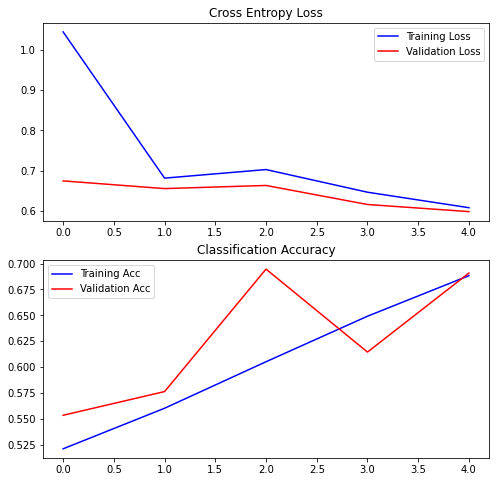

In [ ]:
def Lost_Accuracy_plot(history): 
  # a function that build the curves of the loss and accuracy of the training and validation set 
  fig = plt.figure(figsize=(8,8))
  # plot loss
  ax1 = fig.add_subplot(2,1,1)
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='red', label='test')
  ax1.set_title('Cross Entropy Loss')
  ax1.legend(['Training Loss', 'Validation Loss'])
	# plot accuracy
  ax2 = fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='red', label='test')
  ax2.set_title('Classification Accuracy')
  ax2.legend(['Training Acc', 'Validation Acc'])
  
# Learning curves
Lost_Accuracy_plot(history)

In [ ]:
#train and validation performances 
df=pd.DataFrame(history.history)
df.tail()
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.044483,0.521033,0.674396,0.553435
1,0.681288,0.560229,0.655303,0.576336
2,0.702564,0.605163,0.663087,0.694656
3,0.646316,0.649140,0.615786,0.614504
4,0.607813,0.688336,0.598129,0.690840


These results show that the model is overfitting after few iterations, the training metric improves but the model is not performing well on the test set.

#**How can we avoid and prevent Overfitting ?**

#**Data Augmentation:**

We use data augmentation to expand the training dataset in order to improve the performance and ability of the model to generalize.

In [ ]:
#Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True) #an instance of the ImageDataGenerator class is contructed 
it_train = datagen.flow(train_images, train_labels, batch_size=64) # Once constructed , an iterator is created from an image dataset loaded in memory via the flow() function

In [ ]:
#fitting the basic model with Augmented Data:
epochs = 5
print("Training the model WITH Augmented Data")
steps = int(train_images.shape[0] / 64)
history2 = basic_model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels), verbose=1)

Training the model WITH Augmented Data
Epoch 1/5
16/16 [==============================] - 121s 8s/step - loss: 0.5905 - accuracy: 0.6986 - val_loss: 0.5310 - val_accuracy: 0.7481
Epoch 2/5
16/16 [==============================] - 120s 7s/step - loss: 0.5963 - accuracy: 0.6986 - val_loss: 0.5131 - val_accuracy: 0.7901
Epoch 3/5
16/16 [==============================] - 120s 7s/step - loss: 0.5641 - accuracy: 0.7108 - val_loss: 0.5275 - val_accuracy: 0.7786
Epoch 4/5
16/16 [==============================] - 123s 8s/step - loss: 0.5849 - accuracy: 0.7002 - val_loss: 0.6224 - val_accuracy: 0.7137
Epoch 5/5
16/16 [==============================] - 119s 7s/step - loss: 0.6335 - accuracy: 0.6945 - val_loss: 0.5222 - val_accuracy: 0.7557


In [ ]:
#evaluating the new model ( basic_model+data augmentation)
_, acc = basic_model.evaluate(test_images, test_labels, verbose=1)
print('> %.2f ' % (acc * 100.0))

9/9 [==============================] - 7s 780ms/step - loss: 0.5222 - accuracy: 0.7557
> 75.57 


The evaluation shows that the news basic model is better than the first model!

In [ ]:
#the new train and validation perfomances 
df=pd.DataFrame(history2.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
0,0.590548,0.698574,0.530958,0.748092
1,0.596304,0.698574,0.513068,0.790076
2,0.564146,0.710794,0.527460,0.778626
3,0.584899,0.700195,0.622439,0.713740
4,0.633527,0.694501,0.522214,0.755725


**Data augmentation minimize the distance between the training and validation set and avoid overfitting .The performance of the model improves.**

**It reduced the gap between training and validation performances. It helps to generalize better, but we still need a more powerful model**



#**Transfert Learning -- VGG19** (This part will focus on training the model using the transfert learning) 

Transfer learning is about borrowing CNN architecture with its pre-trained parameters from someone else. When we train our own data on the top of the pre-trained parameters, we can easily reach to the target accuracy.

In [ ]:
#We chose the VGG19 model for the transfert learning:
vgg19_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape) #load the model 
vgg19_model.trainable = True

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.GlobalAveragePooling2D())
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))  #using relu for the hidden layer 
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.9))
top_layers.add(tf.keras.layers.Dense(1,activation='sigmoid')) #we chose sigmoid as an activation for the output layer
model= tf.keras.Sequential([vgg19_model, top_layers])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 9, 9, 512)         20024384  
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 66305     
Total params: 20,090,689
Trainable params: 20,090,433
Non-trainable params: 256
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9) #the optimizer here is SGD with learning rate=0.0005 and  momentum 0.9
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) #binary crossentropy for the loss 

In [ ]:
# Fit the transfert learning model -- VGG19
epochs = 5
print("Training with Transfert learning")
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=64, validation_data=(test_images, test_labels))

Training with Transfert learning
Epoch 1/5
17/17 [==============================] - 4324s 255s/step - loss: 1.2667 - accuracy: 0.5547 - val_loss: 0.6763 - val_accuracy: 0.4885
Epoch 2/5
17/17 [==============================] - 4329s 255s/step - loss: 0.8230 - accuracy: 0.6574 - val_loss: 0.5607 - val_accuracy: 0.6260
Epoch 3/5
17/17 [==============================] - 4339s 256s/step - loss: 0.3980 - accuracy: 0.8269 - val_loss: 0.3682 - val_accuracy: 0.9275
Epoch 4/5
17/17 [==============================] - 4325s 255s/step - loss: 0.2716 - accuracy: 0.8949 - val_loss: 0.2388 - val_accuracy: 0.9656
Epoch 5/5
17/17 [==============================] - 4309s 254s/step - loss: 0.2067 - accuracy: 0.9253 - val_loss: 0.2342 - val_accuracy: 0.9618


In [ ]:
#evaluating the VGG19 model:
_, acc = model.evaluate(test_images, test_labels, verbose=1) 
print('> %.2f '%  (acc * 100.0))

9/9 [==============================] - 289s 32s/step - loss: 0.2342 - accuracy: 0.9618
> 96.18 


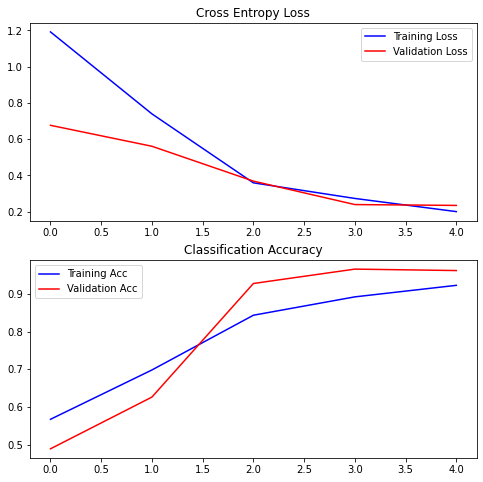

In [ ]:
#plot the accuracy and the loss of the training and the validation data 
Lost_Accuracy_plot(history)

In [ ]:
df=pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
0,1.191811,0.566922,0.676282,0.488550
1,0.739341,0.697897,0.560661,0.625954
2,0.358807,0.843212,0.368232,0.927481
3,0.272676,0.891969,0.238837,0.965649
4,0.200024,0.922562,0.234247,0.961832


**As expected , we've got a higher accuracy with VGG19 transfer learning it shows a notable performances it prevents overfitting, but we can do better with data augmentation.**


#**Transfert learning+ Data augmentation**

In [ ]:
#we use here the data augmentation for our VGG19 model:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_images, train_labels, batch_size=64)

In [ ]:
#fitting the VGG19 model with Augmented Data 
print("Training WITH Transfert Learning & Augmented Data")
steps = int(train_images.shape[0] / 64) 
history2 = model.fit(it_train, steps_per_epoch=steps, epochs=3, validation_data=(test_images, test_labels), verbose=1)

Training WITH Transfert Learning & Augmented Data
Epoch 1/3
16/16 [==============================] - 4285s 269s/step - loss: 0.1626 - accuracy: 0.9375 - val_loss: 0.2087 - val_accuracy: 0.9351
Epoch 2/3
16/16 [==============================] - 4090s 256s/step - loss: 0.1524 - accuracy: 0.9542 - val_loss: 0.2103 - val_accuracy: 0.9275
Epoch 3/3
16/16 [==============================] - 4100s 257s/step - loss: 0.1294 - accuracy: 0.9521 - val_loss: 0.1452 - val_accuracy: 0.9656


In [ ]:
#evaluating the new VGG19 model with Data augmentation 
_, acc = model.evaluate(test_images, test_labels, verbose=1)
print('> %.2f '% (acc * 100.0))

9/9 [==============================] - 287s 32s/step - loss: 0.1452 - accuracy: 0.9656
> 96.56 


In [ ]:
df=pd.DataFrame(history2.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
0,0.162592,0.937500,0.208692,0.935115
1,0.152378,0.954175,0.210333,0.927481
2,0.129432,0.952138,0.145185,0.965649


**Transfer Learning with Data Augmentation shows a good performance as well , the model appeares to have a high accuracy.**

#**Submission in Zindi**

**In this part we will predict our model and submit the results in Zindi** 

In [ ]:
train_images_list = train['image'].tolist() #convert images column into list
images_list = os.listdir('/content/drive/MyDrive/my_dataset/images/') #image entries
test_images_list = [i for i in images_list if i not in train_images_list] #check the entries of image and append them to 
# test_image_list only if doesn't already exist in train image list

In [ ]:
test_data = image_prep(test_images_list)  #image_prep is the function of the first part that converts images to arrays 

In [ ]:
predictions=model.predict(test_data) #predit our model ( the last model of VGG19 with Data augmentation )

In [ ]:
submission.shape

(525, 2)

In [ ]:
submission = pd.DataFrame({"image":test_images_list, "target":predictions.reshape(1,-1)[0]}) #the new data frame that contains 2 columns
#the first column contains the images in the test_images-list that are not in the folder images but not in the train_images_list
#the second column contains our prediction of the images 
submission.head()

,image,target
0,hkftgcijkghprpxyuknyfimzjlzpde.jpg,0.804890
1,lazlpqdyqxvdtgtfuwkcplrmtcoeoq.jpg,0.996746
2,usdqhnysmqfjitrxqnfxkureaphlsa.jpg,0.275245
3,vwqrhobzdutxipuwgssuzjbhxumbod.jpg,0.725673
4,zdfiplzlfcwkyfucjdtkskjxjdeavq.jpg,0.121569


In [ ]:
submission.to_csv('/content/drive/MyDrive/my_dataset/first_DL_project.csv',index=False)
